# Iris Project - Hello World of Machine Learning

1. Define Problem.
2. Prepare Data.
3. Evaluate Algorithms.
4. Improve Results.
5. Present Results.

> We are going to use the iris flowers dataset. This dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

> The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

# 1. Import libraries

In [16]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 2. Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Dataset Summerization

1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable

######  We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [4]:
#dimention of dataset
dataset.shape

(150, 5)

In [5]:
# peeking top 20 rows of the data
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
# describing the statistical terms for the dataset
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# class-wise distribution of the data
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# 3. Visulization


We are going to look at two types of plots:

1. Univariate plots to better understand each attribute.
2. ultivariate plots to better understand the relationships between attributes.

# 3.1 Univariate Plots

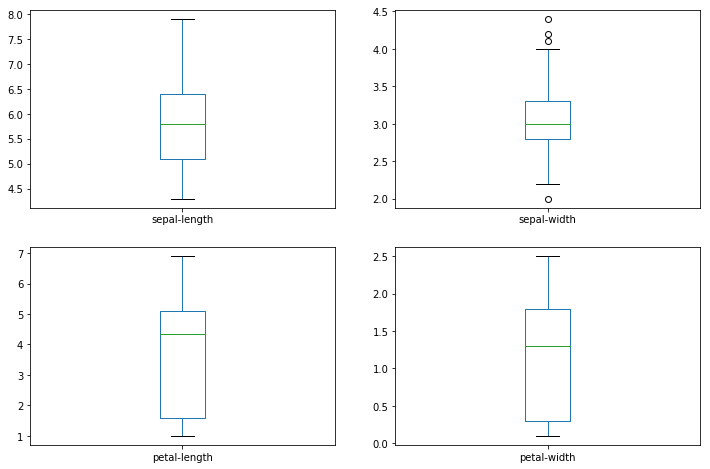

In [10]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,8) )
plt.show()

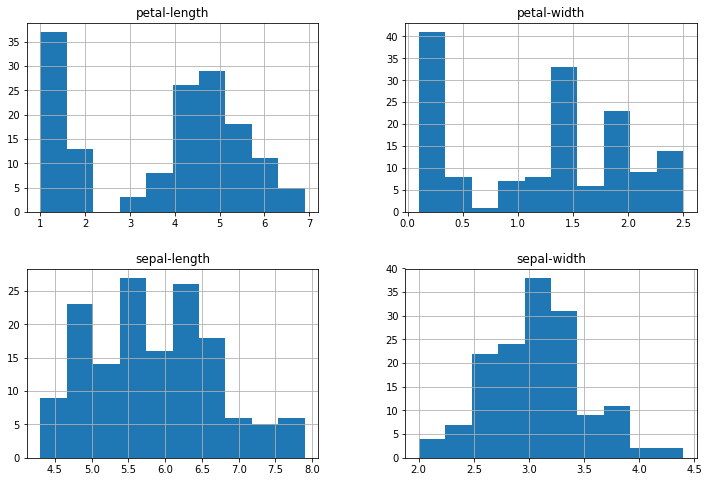

In [12]:
# histograms
dataset.hist(figsize=(12,8))
plt.show()

# 3.2 Multivariate Plots

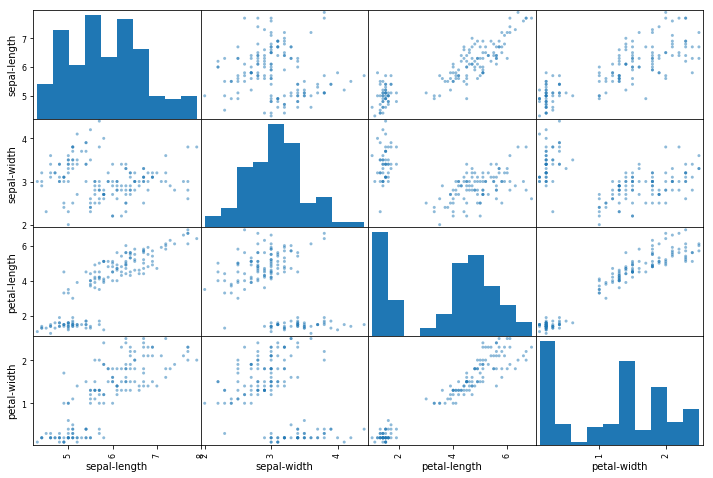

In [24]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(12,8))
plt.show()

# 5. Evaluate Some Algorithms


Here is what we are going to cover in this step:

1. Separate out a test dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build 6 different models to predict species from flower measurements
4. Select the best model.

# 5.1 Create a test set

In [26]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# 10-fold cross validation to estimate accuracy

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [28]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Building Models 

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

In [29]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


# Compate Algorithms

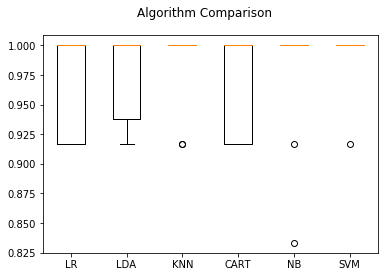

In [34]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# Make predictions using SVM
svm has more accuracy

In [35]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30

